# IPL Player Stats Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\deepa\OneDrive\Desktop\Data Analytics\Project\Cricket\Cricket.csv")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df.describe()

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,Fours,Sixes,Catches_Taken,Stumpings,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
count,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172
unique,18,247,21,12,389,222,576,329,712,6,11,76,42,19,8,21,222,363,31,215,494,382,375,5,3
top,2023,Rohit Sharma,14,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0
freq,162,17,170,421,179,148,171,131,127,1094,783,342,458,263,1057,170,419,419,524,419,524,420,524,1052,1110


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 1172 non-null   object
 1   Player_Name          1172 non-null   object
 2   Matches_Batted       1172 non-null   object
 3   Not_Outs             1172 non-null   object
 4   Runs_Scored          1172 non-null   object
 5   Highest_Score        1172 non-null   object
 6   Batting_Average      1172 non-null   object
 7   Balls_Faced          1172 non-null   object
 8   Batting_Strike_Rate  1172 non-null   object
 9   Centuries            1172 non-null   object
 10  Half_Centuries       1172 non-null   object
 11  Fours                1172 non-null   object
 12  Sixes                1172 non-null   object
 13  Catches_Taken        1172 non-null   object
 14  Stumpings            1172 non-null   object
 15  Matches_Bowled       1172 non-null   object
 16  Balls_

In [5]:
df.columns

Index(['Year', 'Player_Name', 'Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Batting_Average', 'Balls_Faced',
       'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
       'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled',
       'Runs_Conceded', 'Wickets_Taken', 'Best_Bowling_Match',
       'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate',
       'Four_Wicket_Hauls', 'Five_Wicket_Hauls'],
      dtype='object')

## Data Cleaning and Manipulation 

In [6]:
pd.options.mode.copy_on_write=True

In [7]:
df[["wickets_in_best_bowling_match","runs_conceeded_in_best_bowling_match"]]=df["Best_Bowling_Match"].str.split("/",expand=True)

In [8]:
Reordered_Column=['Year', 'Player_Name', 'Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Batting_Average', 'Balls_Faced',
       'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
       'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled',
       'Runs_Conceded', 'Wickets_Taken', 'Best_Bowling_Match',
       'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate',
       'Four_Wicket_Hauls', 'Five_Wicket_Hauls',
       'wickets_in_best_bowling_match', 'runs_conceeded_in_best_bowling_match']


df = df.reindex(columns=Reordered_Column)

In [9]:
#"Player_Name", "Highest_Score" and "Out status" are not converted to numeric for some future oerations
for i in df.columns:
    if i not in ["Player_Name","Out_Status",'Highest_Score']:
        df[i]=pd.to_numeric(df[i],errors='coerce',downcast='integer')

## Classifying the stats with respect to year 

In [10]:
s24 = df.loc[df["Year"] == 2024]
s23 = df.loc[df["Year"] == 2023]
s22 = df.loc[df["Year"] == 2022]
s21 = df.loc[df["Year"] == 2021]
s20 = df.loc[df["Year"] == 2020]
s19 = df.loc[df["Year"] == 2019]

In [18]:
years = {2023: s23, 2022: s22, 2021: s21, 2020: s20, 2019: s19}

# Players with Most Runs 

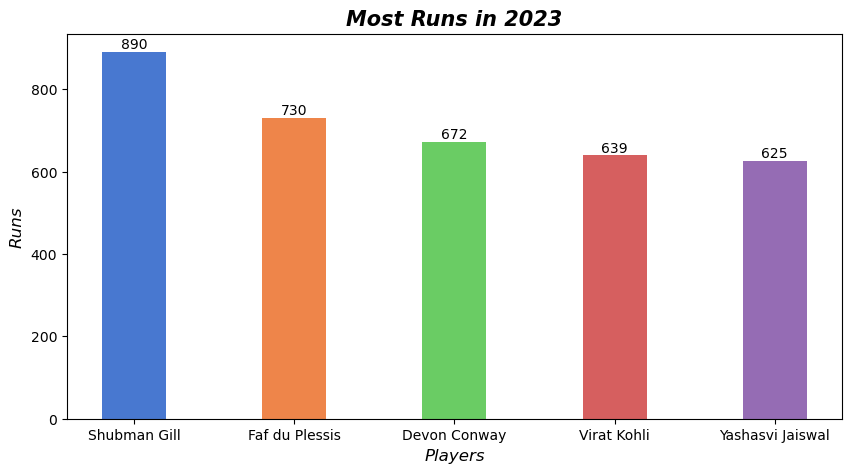

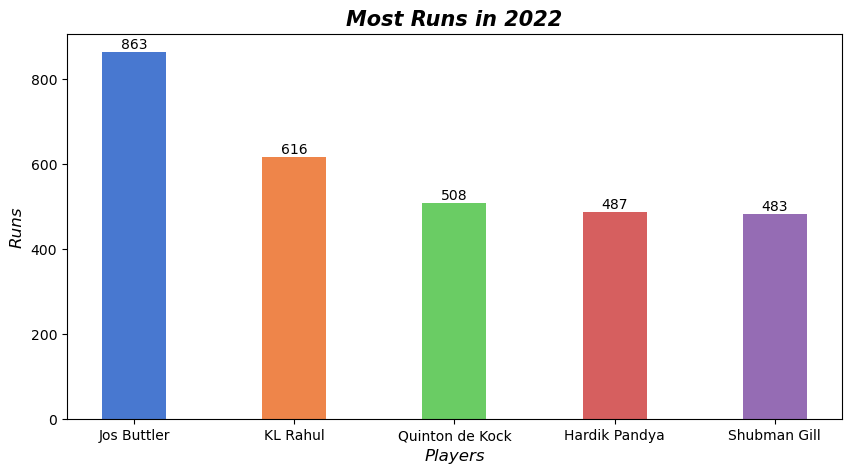

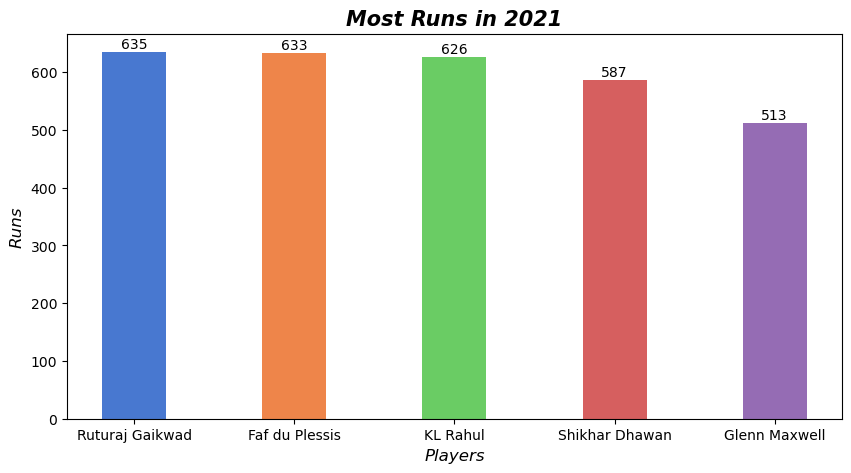

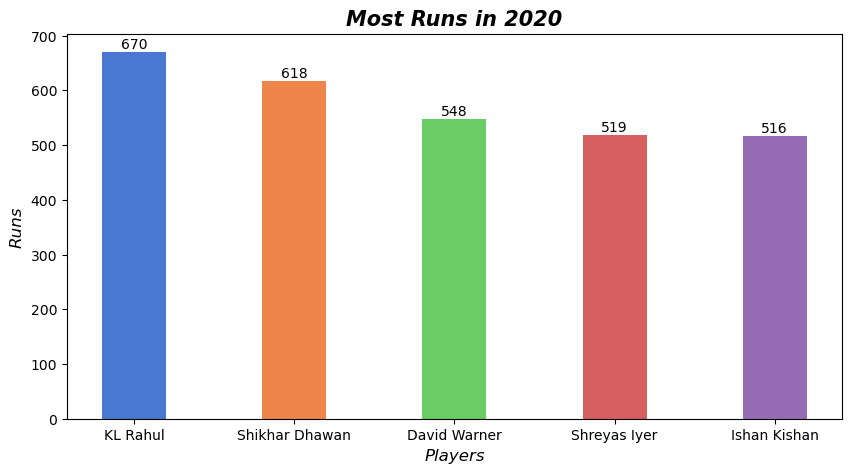

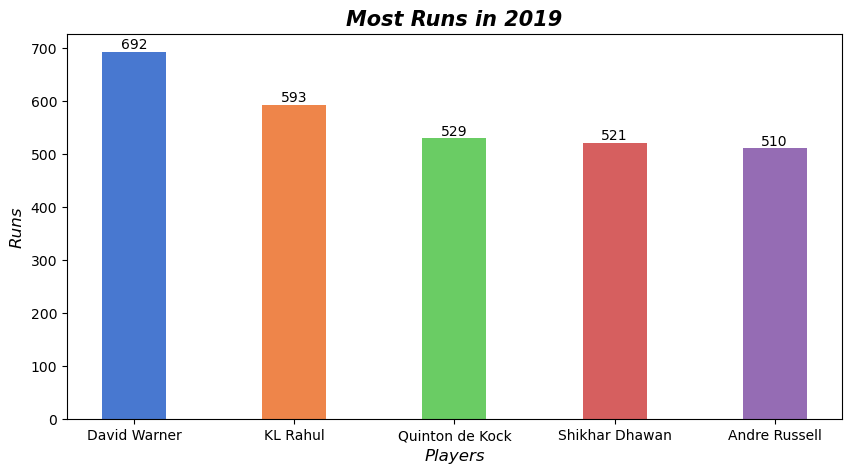

In [23]:
for year,s in years.items():
    sorting_columns=['Runs_Scored']
    runs=s.sort_values(by=sorting_columns,ascending=[False]).head(5)
    palette =sns.color_palette("muted")
    plt.figure(figsize=(10,5))
    x,y=runs["Player_Name"],runs["Runs_Scored"]
    plt.bar(x,y,width=0.4,color=palette)
    plt.title(f"Most Runs in {year}", fontsize=15, fontweight='bold', style='italic')
    plt.xlabel("Players", fontsize=12, style='italic')
    plt.ylabel("Runs", fontsize=12, style='italic')
    for i, v in enumerate(y):
        plt.text(i, v + 1, str(int(v)), ha='center', va='bottom', fontsize=10)
    plt.show()

## Most Wickets

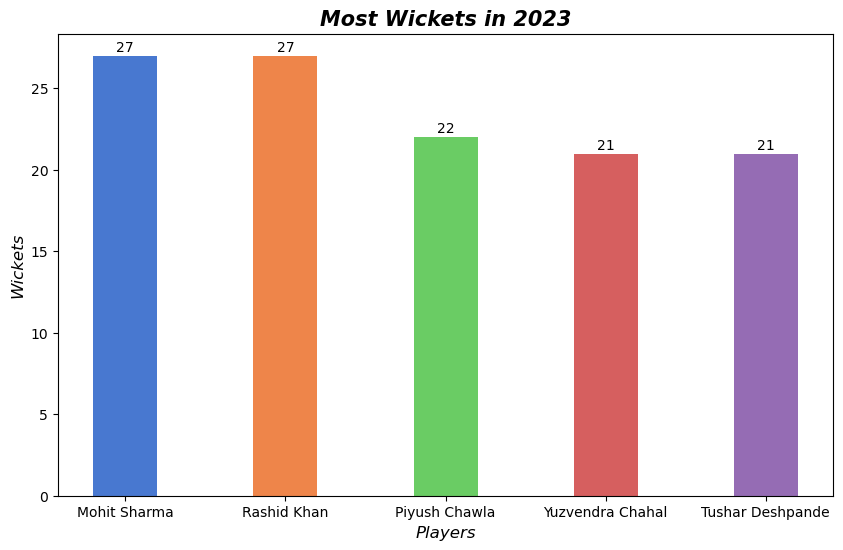

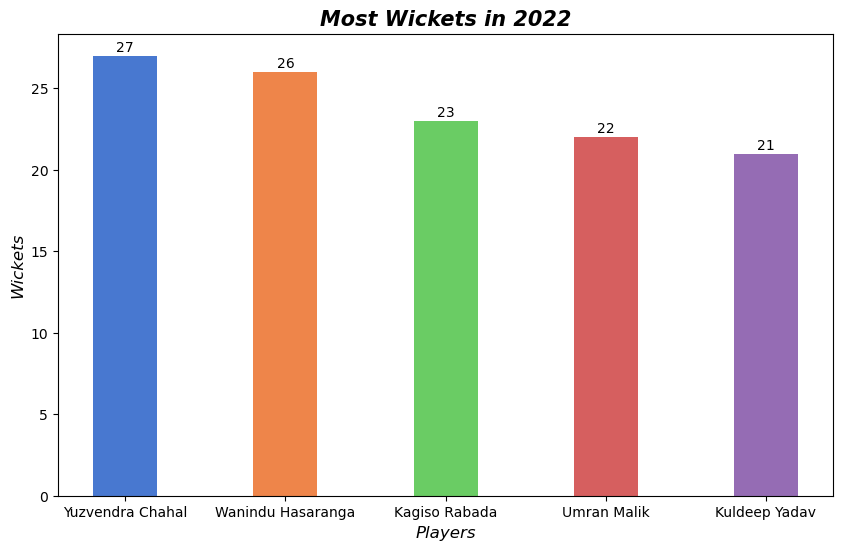

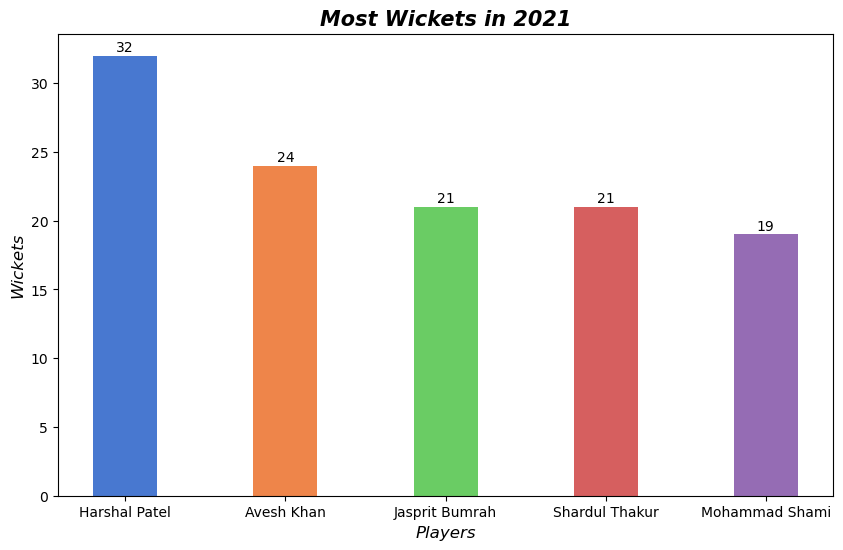

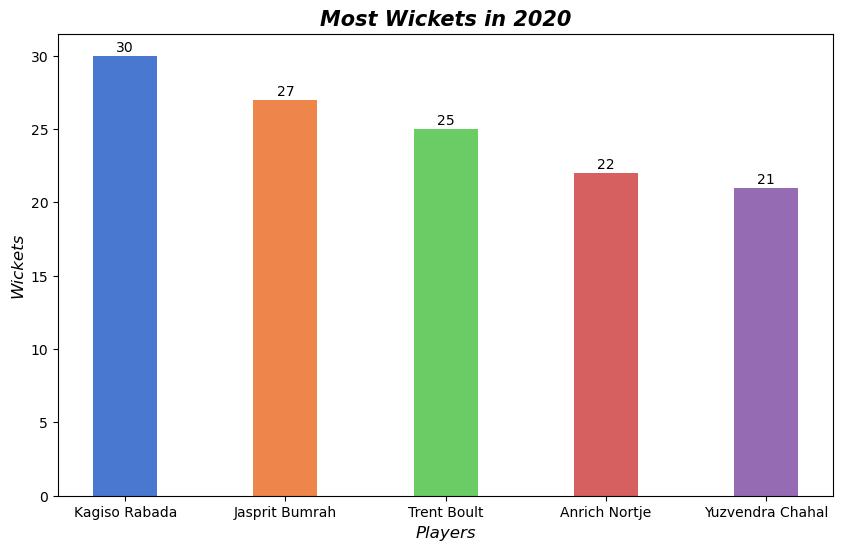

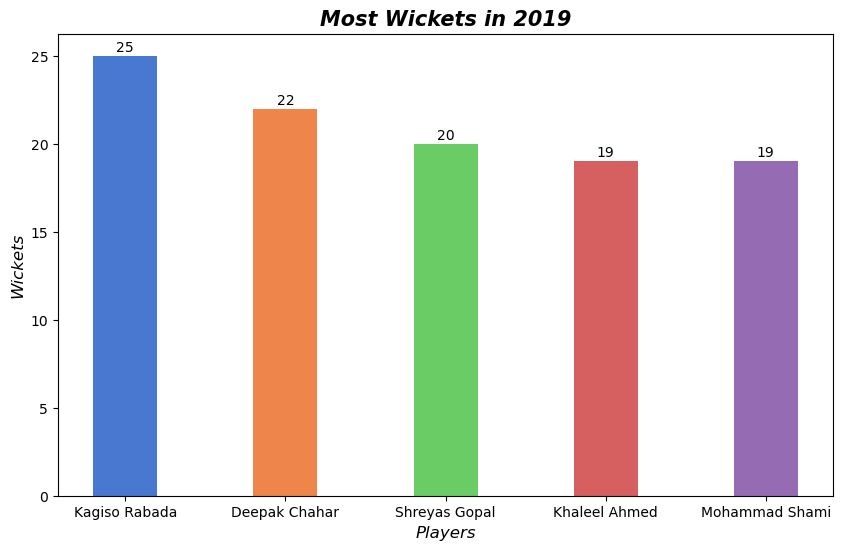

In [36]:
for year,s in years.items():
    sorting_columns=['Wickets_Taken','Balls_Bowled','Bowling_Average','Bowling_Strike_Rate']
    wickets=s.sort_values(by=sorting_columns,ascending=[False,True,True,True]).head(5)
    palette =sns.color_palette("muted")
    plt.figure(figsize=(10,6))
    x,y=wickets["Player_Name"],wickets["Wickets_Taken"]
    plt.bar(x,y,width=0.4,color=palette)
    plt.title(f"Most Wickets in {year}", fontsize=15, fontweight='bold', style='italic')
    plt.xlabel("Players", fontsize=12, style='italic')
    plt.ylabel("Wickets", fontsize=12, style='italic')
    for i, v in enumerate(y):
        plt.text(i, v + 0.09, str(int(v)), ha='center', va='bottom', fontsize=10)
    plt.show()

# Batting average

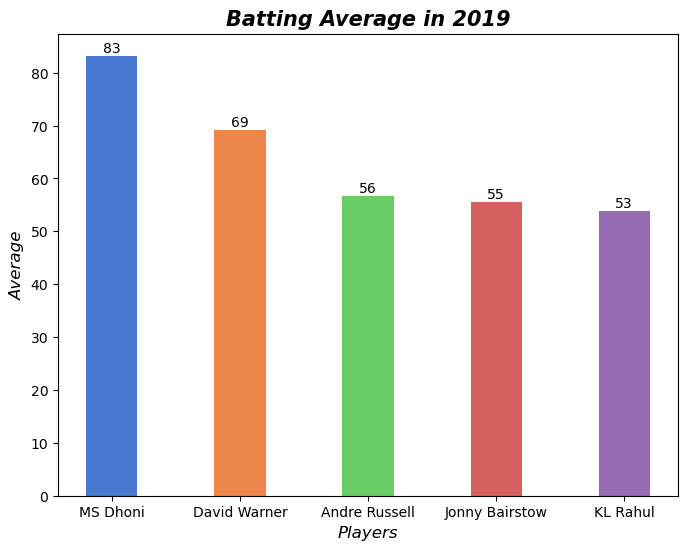

In [48]:
# for year,s in years.items():
sorting_columns=['Batting_Average','Matches_Batted']
batavg=s.sort_values(by=sorting_columns,ascending=[False,True]).head(5)
palette =sns.color_palette("muted")
plt.figure(figsize=(8,6))
x,y=batavg["Player_Name"],batavg["Batting_Average"]
plt.bar(x,y,width=0.4,color=palette)
plt.title(f"Batting Average in {year}", fontsize=15, fontweight='bold', style='italic')
plt.xlabel("Players", fontsize=12, style='italic')
plt.ylabel("Average", fontsize=12, style='italic')
for i, v in enumerate(y):
    plt.text(i, v + 0.09, str(int(v)), ha='center', va='bottom', fontsize=10)
plt.show()

# Stumpings

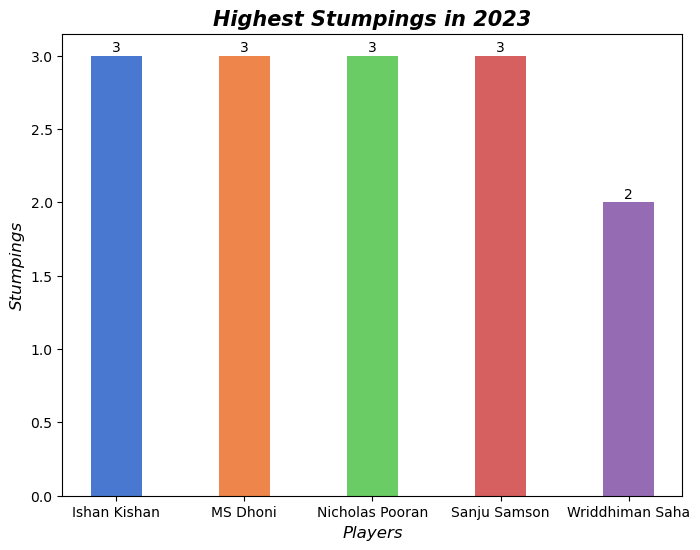

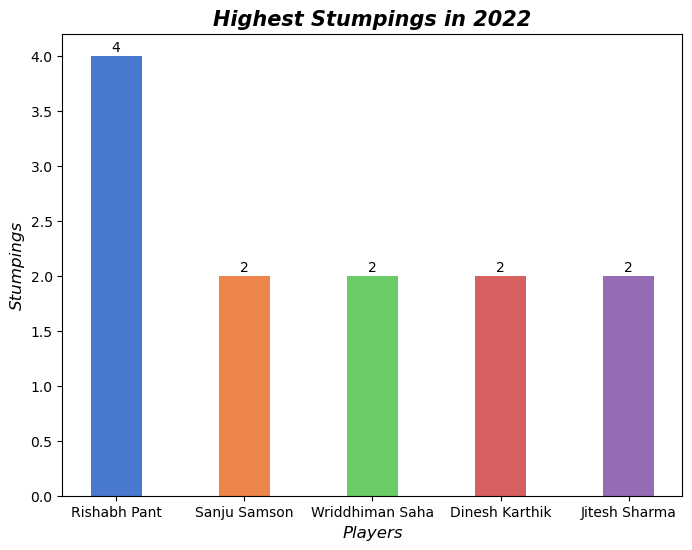

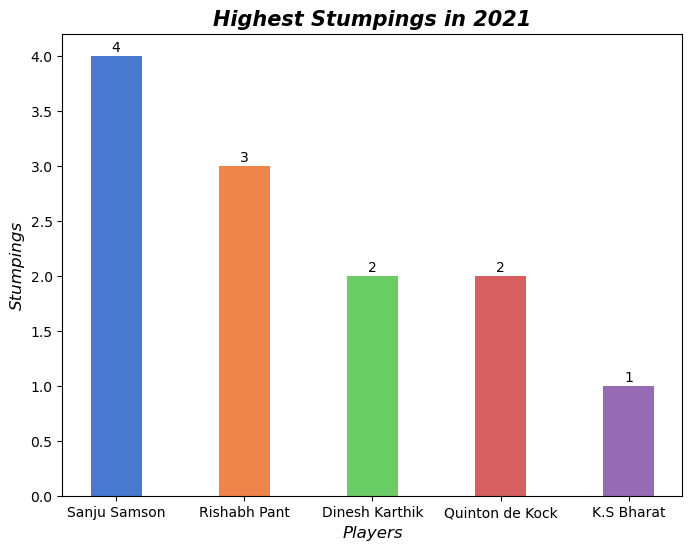

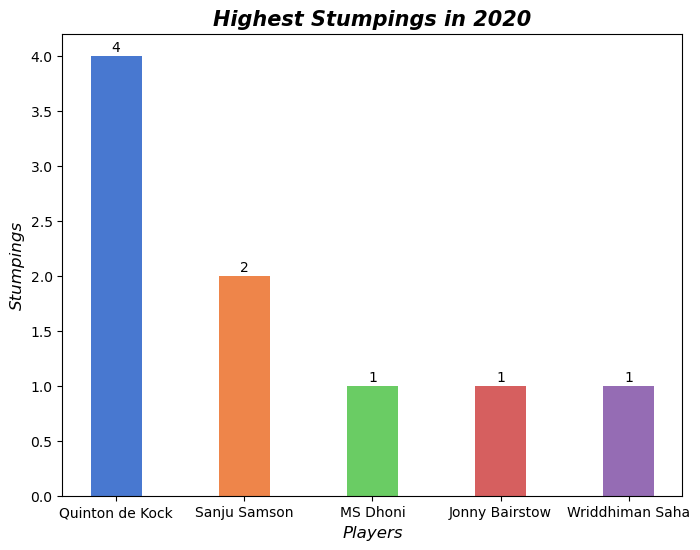

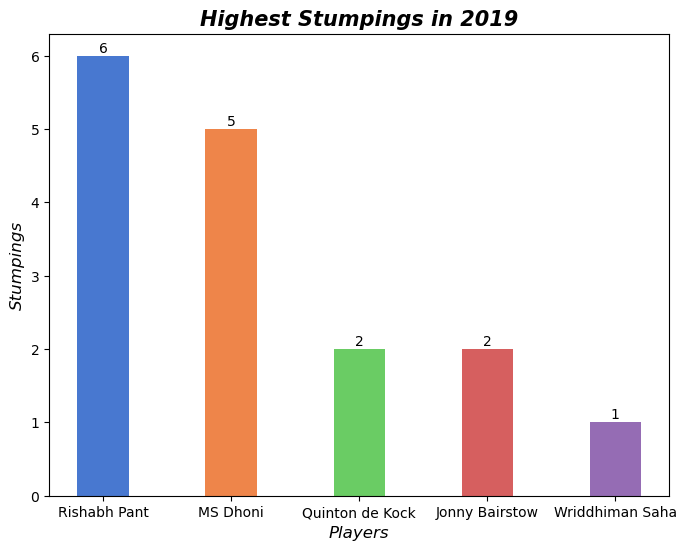

In [45]:
for year,s in years.items():
    sorting_columns=['Stumpings','Catches_Taken']
    stump=s.sort_values(by=sorting_columns,ascending=[False,False]).head(5)
    palette =sns.color_palette("muted")
    plt.figure(figsize=(8,6))
    x,y=stump["Player_Name"],stump["Stumpings"]
    plt.bar(x,y,width=0.4,color=palette)
    plt.title(f"Highest Stumpings in {year}", fontsize=15, fontweight='bold', style='italic')
    plt.xlabel("Players", fontsize=12, style='italic')
    plt.ylabel("Stumpings", fontsize=12, style='italic')
    for i, v in enumerate(y):
        plt.text(i, v + 0.01, str(int(v)), ha='center', va='bottom', fontsize=10)
    plt.show()

# 4 Wicket Hauls

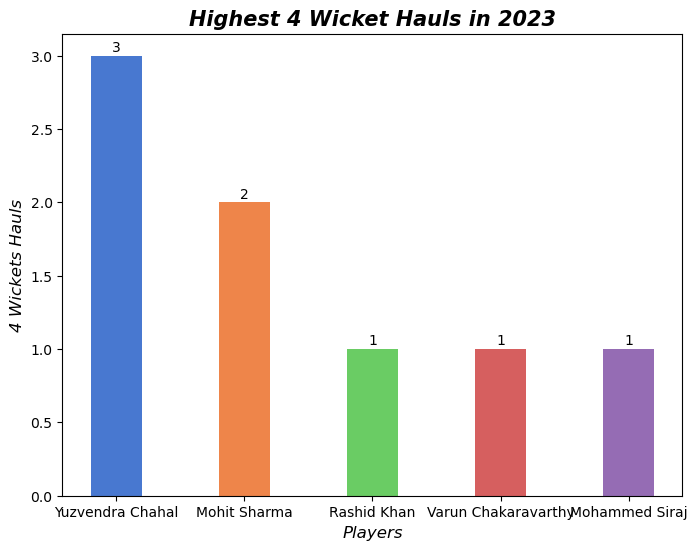

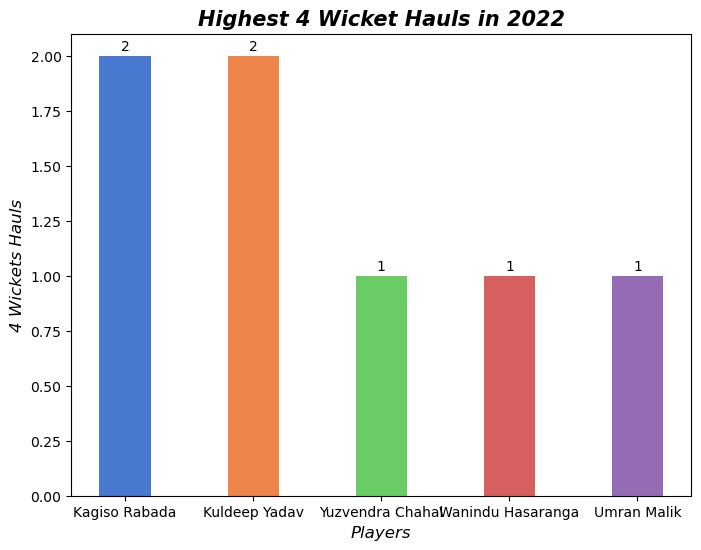

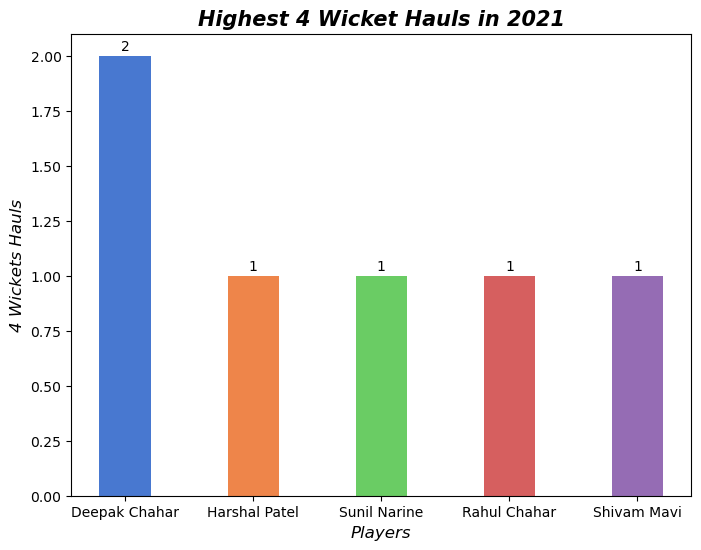

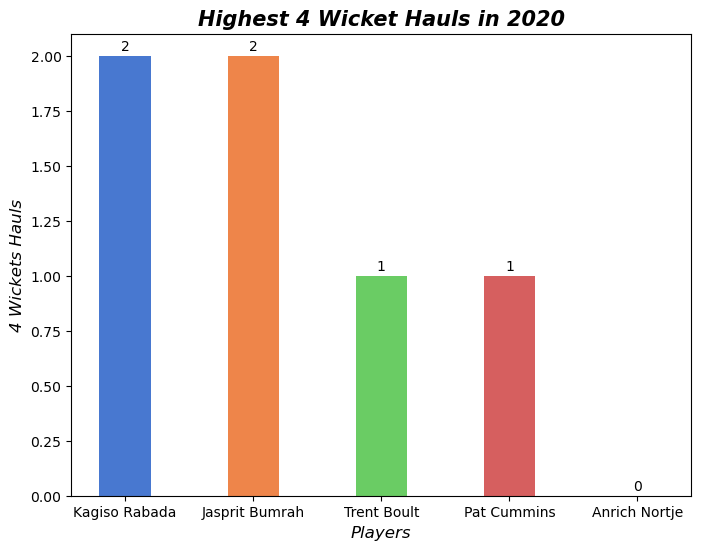

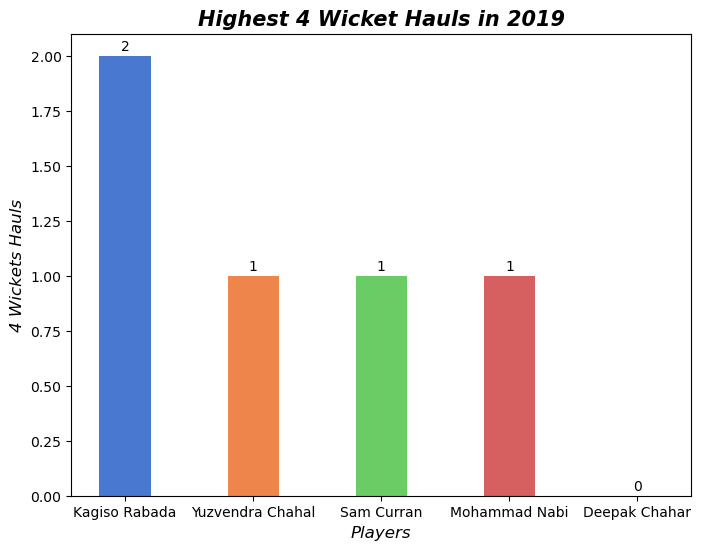

In [46]:
for year,s in years.items():
    sorting_columns=['Four_Wicket_Hauls','Wickets_Taken','Bowling_Average','Five_Wicket_Hauls']
    fourwh=s.sort_values(by=sorting_columns,ascending=[False,False,True,False]).head(5)
    palette =sns.color_palette("muted")
    plt.figure(figsize=(8,6))
    x,y=fourwh["Player_Name"],fourwh["Four_Wicket_Hauls"]
    plt.bar(x,y,width=0.4,color=palette)
    plt.title(f"Highest 4 Wicket Hauls in {year}", fontsize=15, fontweight='bold', style='italic')
    plt.xlabel("Players", fontsize=12, style='italic')
    plt.ylabel("4 Wickets Hauls", fontsize=12, style='italic')
    for i, v in enumerate(y):
        plt.text(i, v + 0.01, str(int(v)), ha='center', va='bottom', fontsize=10)
    plt.show()

# 5 Wicket Hauls

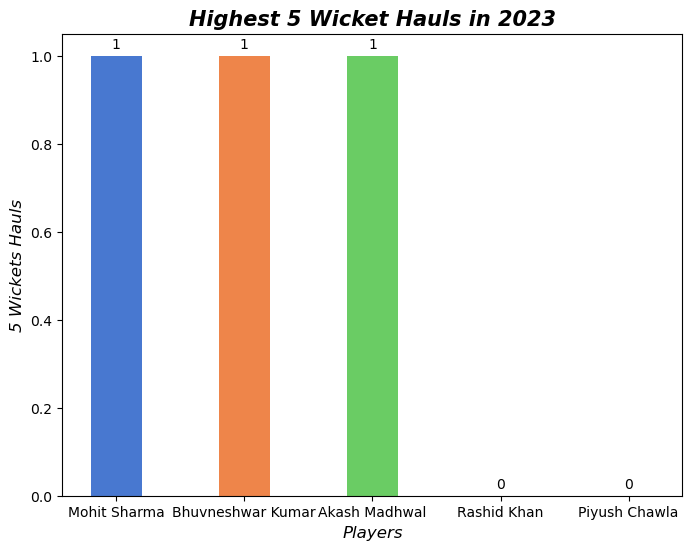

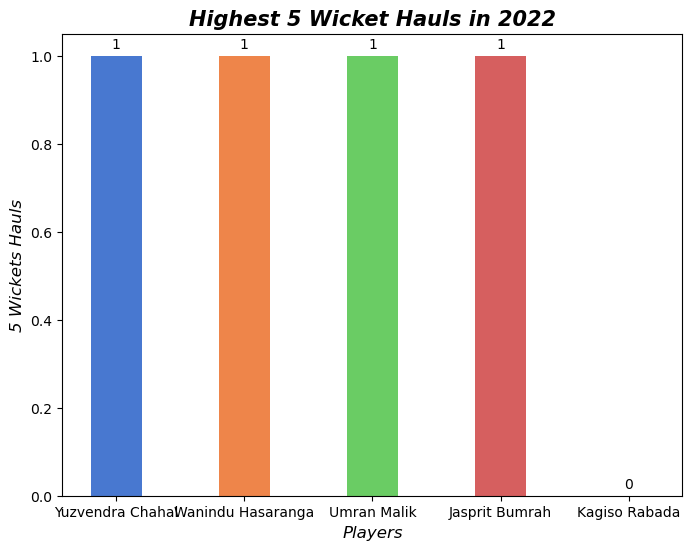

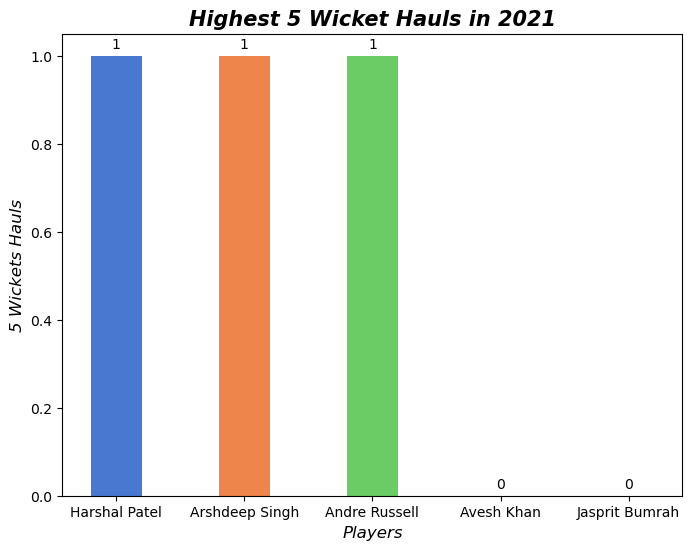

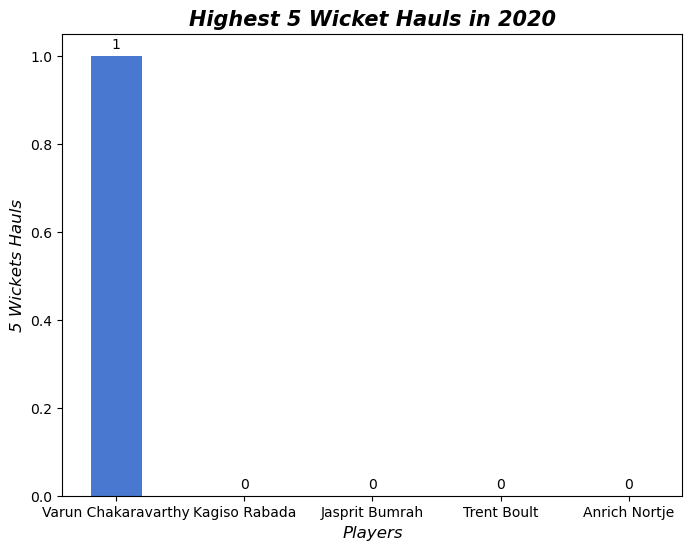

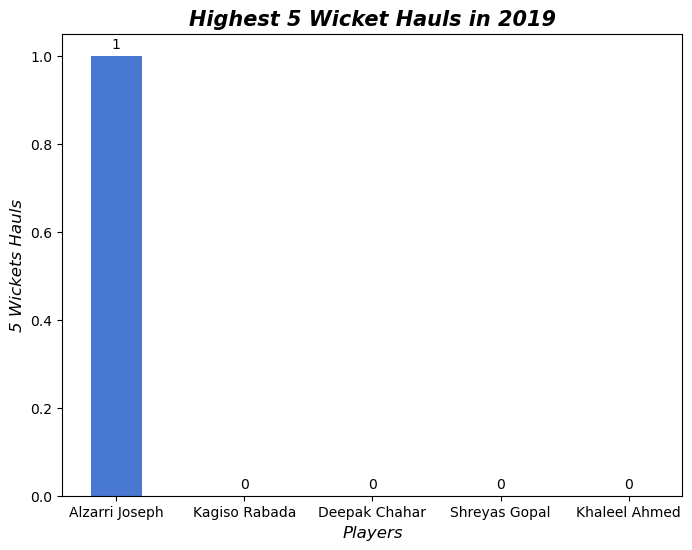

In [49]:
for year,s in years.items():
    sorting_columns=['Five_Wicket_Hauls','Wickets_Taken','Bowling_Average','Four_Wicket_Hauls']
    fivewh=s.sort_values(by=sorting_columns,ascending=[False,False,True,False]).head(5)
    palette =sns.color_palette("muted")
    plt.figure(figsize=(8,6))
    x,y=fivewh["Player_Name"],fivewh["Five_Wicket_Hauls"]
    plt.bar(x,y,width=0.4,color=palette)
    plt.title(f"Highest 5 Wicket Hauls in {year}", fontsize=15, fontweight='bold', style='italic')
    plt.xlabel("Players", fontsize=12, style='italic')
    plt.ylabel("5 Wickets Hauls", fontsize=12, style='italic')
    for i, v in enumerate(y):
        plt.text(i, v + 0.01, str(int(v)), ha='center', va='bottom', fontsize=10)
    plt.show()